In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [13]:
df = pd.read_csv('./긍정부정.csv')

df

,title,content,new_content,party_content,party_name,label
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""","[""JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...","[""JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...",[],[],[]
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"['ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마...","['ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마...","[' 더불어민주당은 정책, 영입을 병행 추진하고 있다', ' 자유한국당은 선거연령...","['더불어민주당', '자유한국당']","['부정', '부정']"
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...,['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...,['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...,"['자유한국당', '자유한국당']","['부정', '부정']"
3,"한국당, 추미애 檢 고발..""선거법 위반""","['곽상도 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...","['곽상도 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...",[' (사진=노진환 기자)[이데일리 김겨레 기자]자유한국당이 1일 추미애 법무부 장...,['더불어민주당'],['부정']
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","['""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 \'아빠 찬스, 아들 ...","['""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 \'아빠 찬스, 아들 ...",[' 그러면서 자유한국당이 자신을 향해 아들 공천 문제 때문에 여당 편을 든다고 반...,['자유한국당'],['긍정']
...,...,...,...,...,...,...
79405,‘세월호 막말’ 닷새만에… 차명진 제명,"['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태...","['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태...","['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태...",['미래통합당'],['부정']
79406,정봉주 “나를 개쓰레기 취급” 與 막말 비난,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...,"['더불어민주당', '열린민주당', '열린민주당', '열린민주당', '더불어시민당'...","['부정', '부정', '부정', '부정', '부정', '부정']"
79407,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,['이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김...,['이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김...,['com 4·15총선을 이틀 남긴 13일 정치권은 미래통합당이 제기한 ‘여...,"['미래통합당', '더불어민주당', '더불어시민당']","['부정', '부정', '긍정']"
79408,"[총선2020] 범여권, '오세훈만 떨어뜨리면 된다' 계산 섰나","['민주당 핵심 당직자들, 한날 광진을 지원방문\'촛불시민모임\' \'대진연\' 등...","['민주당 핵심 당직자들, 한날 광진을 지원방문\'촛불시민모임\' \'대진연\' 등...","[' 더불어민주당 이낙연 상임선거대책위원장, 이인영 원내대표, 박광온 최고위원 등 ...","['더불어민주당', '미래통합당', '미래통합당']","['부정', '부정', '긍정']"


In [240]:
# 값이 비어있는 것을 제거
# 리스트의 길이가 2면 빈 리스트이다

news = df.copy()
news = news[news['party_content'].apply(lambda x : len(x) > 2)]

news

,title,content,new_content,party_content,party_name,label
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"['ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마...","['ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마...","[' 더불어민주당은 정책, 영입을 병행 추진하고 있다', ' 자유한국당은 선거연령...","['더불어민주당', '자유한국당']","['부정', '부정']"
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...,['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...,['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...,"['자유한국당', '자유한국당']","['부정', '부정']"
3,"한국당, 추미애 檢 고발..""선거법 위반""","['곽상도 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...","['곽상도 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...",[' (사진=노진환 기자)[이데일리 김겨레 기자]자유한국당이 1일 추미애 법무부 장...,['더불어민주당'],['부정']
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","['""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 \'아빠 찬스, 아들 ...","['""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 \'아빠 찬스, 아들 ...",[' 그러면서 자유한국당이 자신을 향해 아들 공천 문제 때문에 여당 편을 든다고 반...,['자유한국당'],['긍정']
5,"靑, 이르면 6일 비서진 교체·조직 개편…윤건영 구로을 출마 유력",['윤 후임에 오종식·신상엽·이진석 등 거론고민정 불출마로 입장 정리한듯…사실상 중...,['윤 후임에 오종식·신상엽·이진석 등 거론고민정 불출마로 입장 정리한듯…사실상 중...,[' 출마지역으로는 문 대통령 사저가 있고 서형수 현 더불어민주당 의원이 불출마를 ...,"['더불어민주당', '더불어민주당']","['부정', '부정']"
...,...,...,...,...,...,...
79405,‘세월호 막말’ 닷새만에… 차명진 제명,"['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태...","['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태...","['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태...",['미래통합당'],['부정']
79406,정봉주 “나를 개쓰레기 취급” 與 막말 비난,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...,"['더불어민주당', '열린민주당', '열린민주당', '열린민주당', '더불어시민당'...","['부정', '부정', '부정', '부정', '부정', '부정']"
79407,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,['이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김...,['이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김...,['com 4·15총선을 이틀 남긴 13일 정치권은 미래통합당이 제기한 ‘여...,"['미래통합당', '더불어민주당', '더불어시민당']","['부정', '부정', '긍정']"
79408,"[총선2020] 범여권, '오세훈만 떨어뜨리면 된다' 계산 섰나","['민주당 핵심 당직자들, 한날 광진을 지원방문\'촛불시민모임\' \'대진연\' 등...","['민주당 핵심 당직자들, 한날 광진을 지원방문\'촛불시민모임\' \'대진연\' 등...","[' 더불어민주당 이낙연 상임선거대책위원장, 이인영 원내대표, 박광온 최고위원 등 ...","['더불어민주당', '미래통합당', '미래통합당']","['부정', '부정', '긍정']"


당에 대한 부정, 긍정 빈도수 확인1

In [261]:
df2 = df.copy()
df2 = df2[['party_content', 'party_name', 'label']]
df2 = df2.reset_index(drop = True)

df2

,party_content,party_name,label
0,[],[],[]
1,"[' 더불어민주당은 정책, 영입을 병행 추진하고 있다', ' 자유한국당은 선거연령...","['더불어민주당', '자유한국당']","['부정', '부정']"
2,['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...,"['자유한국당', '자유한국당']","['부정', '부정']"
3,[' (사진=노진환 기자)[이데일리 김겨레 기자]자유한국당이 1일 추미애 법무부 장...,['더불어민주당'],['부정']
4,[' 그러면서 자유한국당이 자신을 향해 아들 공천 문제 때문에 여당 편을 든다고 반...,['자유한국당'],['긍정']
...,...,...,...
79405,"['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태...",['미래통합당'],['부정']
79406,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...,"['더불어민주당', '열린민주당', '열린민주당', '열린민주당', '더불어시민당'...","['부정', '부정', '부정', '부정', '부정', '부정']"
79407,['com 4·15총선을 이틀 남긴 13일 정치권은 미래통합당이 제기한 ‘여...,"['미래통합당', '더불어민주당', '더불어시민당']","['부정', '부정', '긍정']"
79408,"[' 더불어민주당 이낙연 상임선거대책위원장, 이인영 원내대표, 박광온 최고위원 등 ...","['더불어민주당', '미래통합당', '미래통합당']","['부정', '부정', '긍정']"


In [262]:
df2 = df2[df2['party_content'].apply(lambda x : len(x) > 2)]

df2

,party_content,party_name,label
1,"[' 더불어민주당은 정책, 영입을 병행 추진하고 있다', ' 자유한국당은 선거연령...","['더불어민주당', '자유한국당']","['부정', '부정']"
2,['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...,"['자유한국당', '자유한국당']","['부정', '부정']"
3,[' (사진=노진환 기자)[이데일리 김겨레 기자]자유한국당이 1일 추미애 법무부 장...,['더불어민주당'],['부정']
4,[' 그러면서 자유한국당이 자신을 향해 아들 공천 문제 때문에 여당 편을 든다고 반...,['자유한국당'],['긍정']
5,[' 출마지역으로는 문 대통령 사저가 있고 서형수 현 더불어민주당 의원이 불출마를 ...,"['더불어민주당', '더불어민주당']","['부정', '부정']"
...,...,...,...
79405,"['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태...",['미래통합당'],['부정']
79406,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...,"['더불어민주당', '열린민주당', '열린민주당', '열린민주당', '더불어시민당'...","['부정', '부정', '부정', '부정', '부정', '부정']"
79407,['com 4·15총선을 이틀 남긴 13일 정치권은 미래통합당이 제기한 ‘여...,"['미래통합당', '더불어민주당', '더불어시민당']","['부정', '부정', '긍정']"
79408,"[' 더불어민주당 이낙연 상임선거대책위원장, 이인영 원내대표, 박광온 최고위원 등 ...","['더불어민주당', '미래통합당', '미래통합당']","['부정', '부정', '긍정']"


In [264]:
# 당에 대한 부정 및 긍정 빈도수를 저장할 딕셔너리
res_dic = {}

# 각 행에서 당 이름과 해당 당에 대한 감정 레이블 추출 및 빈도수 계산 
for idx, row in df2.iterrows(): # DataFrame의 각 행에 대해 인덱스와 행 데이터를 반복적으로 얻을 수 있다
    parties_lst = eval(row['party_name'])
    label_lst = eval(row['label'])
    
    for party, label in zip(parties_lst, label_lst):
        if party not in res_dic: # 딕셔너리에 당이 없으면 당 이름을 추가
            res_dic[party] = {'긍정' : 0, '부정' : 0}
        res_dic[party][label] += 1 # 딕셔너리에 당이 있으면 부정, 긍정에 해당하는 라벨에 1을 추가
        
# 결과 출력
for party, counts in res_dic.items():
    print('당 : {}'.format(party))
    print('긍정 : {}'.format(counts['긍정']))
    print('부정 : {}'.format(counts['부정']))   

당 : 더불어민주당
긍정 : 2455
부정 : 47271
당 : 자유한국당
긍정 : 750
부정 : 17012
당 : 미래당
긍정 : 349
부정 : 10763
당 : 정의당
긍정 : 911
부정 : 13057
당 : 민중당
긍정 : 161
부정 : 1304
당 : 국민의당
긍정 : 560
부정 : 8935
당 : 무소속
긍정 : 181
부정 : 5788
당 : 우리공화당
긍정 : 113
부정 : 1573
당 : 노동당
긍정 : 6
부정 : 250
당 : 한나라당
긍정 : 4
부정 : 524
당 : 녹색당
긍정 : 53
부정 : 692
당 : 새누리당
긍정 : 70
부정 : 1798
당 : 국가혁명배당금당
긍정 : 69
부정 : 402
당 : 자유당
긍정 : 0
부정 : 81
당 : 공화당
긍정 : 60
부정 : 532
당 : 기본소득당
긍정 : 7
부정 : 215
당 : 국민새정당
긍정 : 0
부정 : 78
당 : 시대전환
긍정 : 12
부정 : 195
당 : 미래한국당
긍정 : 389
부정 : 8943
당 : 통일민주당
긍정 : 0
부정 : 12
당 : 깨어있는시민연대당
긍정 : 0
부정 : 12
당 : 미래민주당
긍정 : 1
부정 : 28
당 : 친박신당
긍정 : 54
부정 : 335
당 : 여성의당
긍정 : 4
부정 : 61
당 : 미래통합당
긍정 : 1623
부정 : 32590
당 : 가자환경당
긍정 : 10
부정 : 173
당 : 남북통일당
긍정 : 0
부정 : 18
당 : 자유의새벽당
긍정 : 0
부정 : 6
당 : 한국경제당
긍정 : 24
부정 : 198
당 : 민생당
긍정 : 639
부정 : 7239
당 : 열린민주당
긍정 : 326
부정 : 3791
당 : 더불어시민당
긍정 : 192
부정 : 2433
당 : 가자!평화인권당
긍정 : 3
부정 : 67
당 : 기독자유통일당
긍정 : 3
부정 : 58
당 : 가자코리아
긍정 : 0
부정 : 1
당 : 대한민국당
긍정 : 0
부정 : 3
당 : 국민참여신당
긍정 : 0
부정 : 1
당 : 한국복지

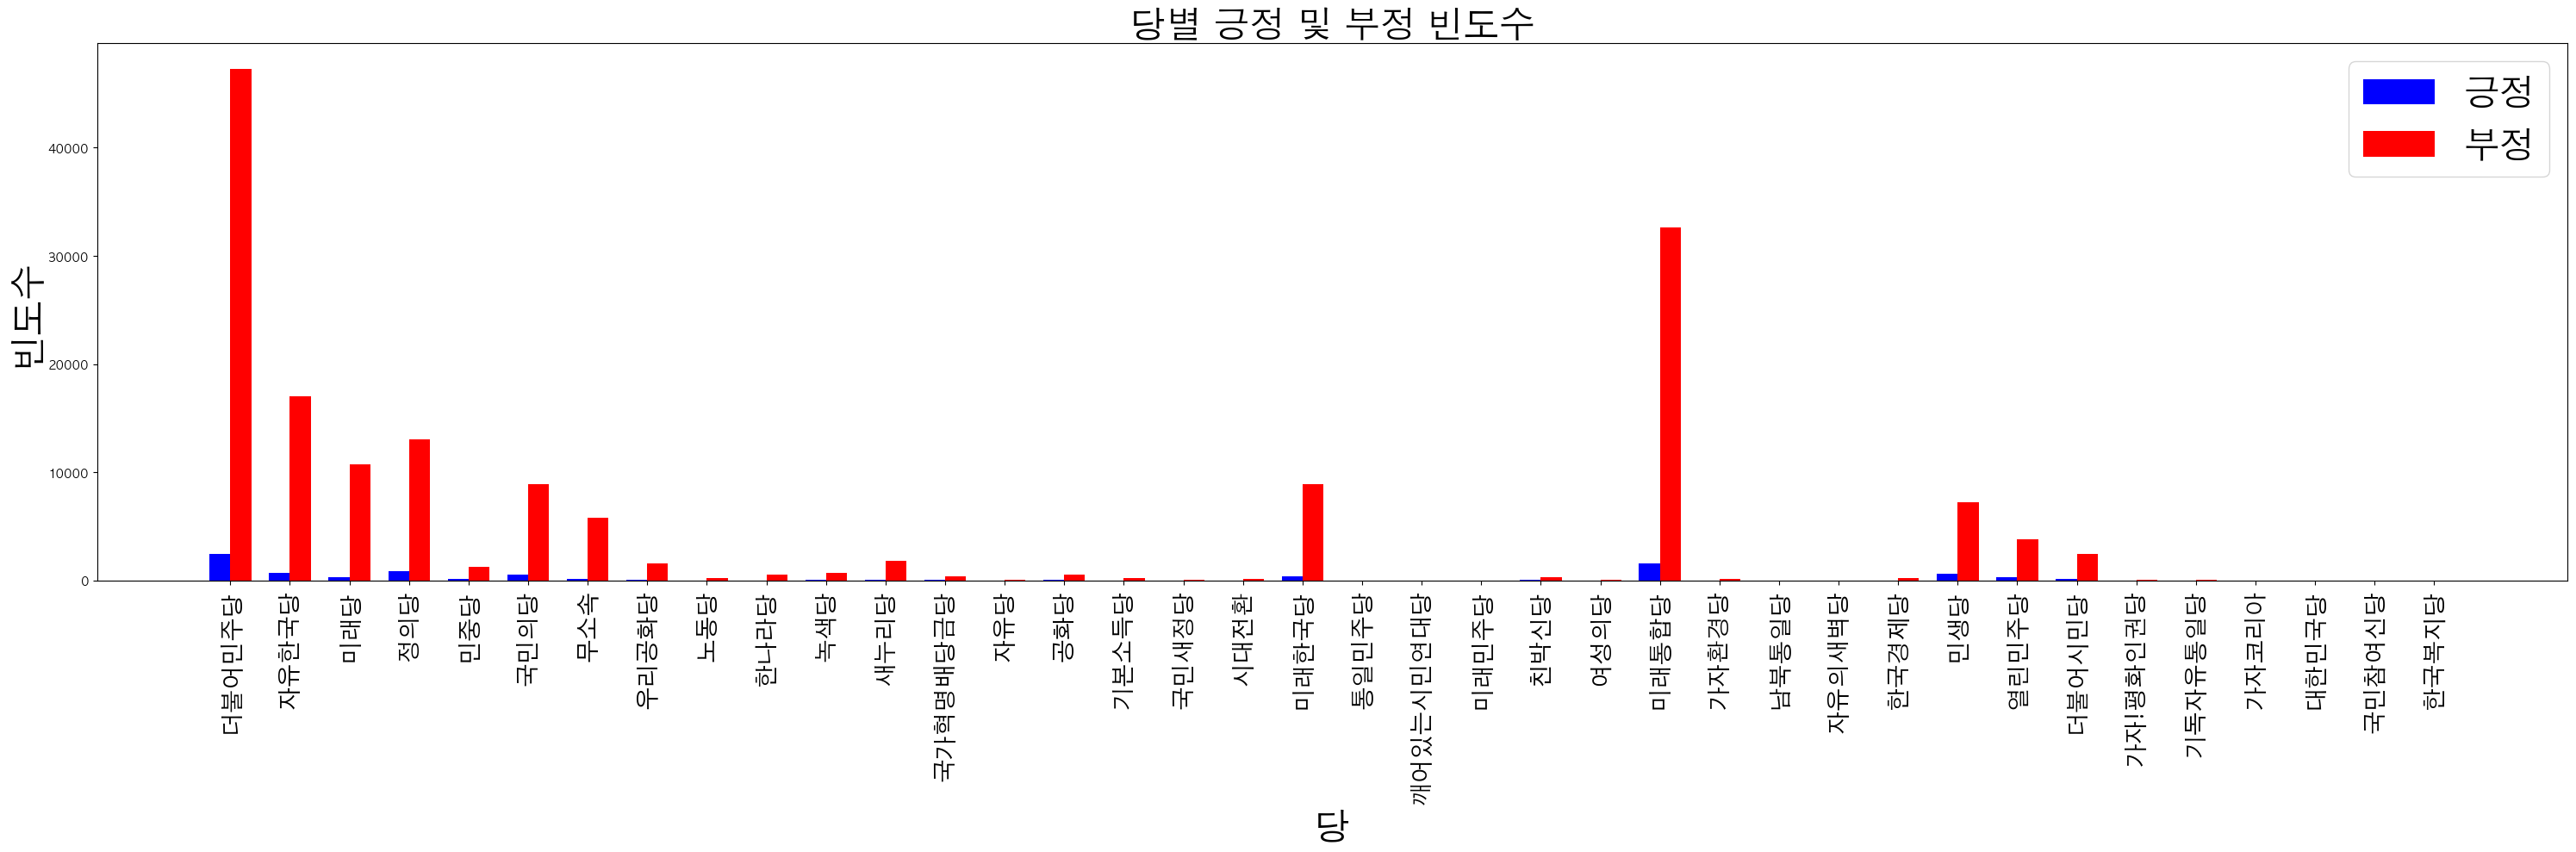

In [269]:
# 그래프를 그리기 위한 데이터 준비
parties = list(res_dic.keys())
positive_counts = [value['긍정'] for value in res_dic.values()]
negative_counts = [value['부정'] for value in res_dic.values()]
total_counts = [pos + neg for pos, neg in zip(positive_counts, negative_counts)]

# 그래프 설정
bar_width = 0.35
index = np.arange(len(parties))  # 막대 그래프의 위치 설정

# 긍정과 부정을 나타내는 막대 그래프 그리기
plt.figure(figsize = (30, 10))
plt.bar(index, positive_counts, bar_width, label='긍정', color='blue', align='center')
plt.bar(index + bar_width, negative_counts, bar_width, label='부정', color='red', align='center')

# 당 이름을 x축에 표시
plt.xlabel('당', fontsize = 30)
plt.ylabel('빈도수', fontsize = 30)
plt.title('당별 긍정 및 부정 빈도수', fontsize = 30)
plt.xticks(index + bar_width / 2, parties, rotation = 90, fontsize = 20)

# 범례 표시
plt.legend(fontsize = 30)

# 그래프 출력
plt.tight_layout()

In [273]:
num_df = pd.DataFrame(res_dic).T

print(num_df.shape)
num_df

(38, 2)


,긍정,부정
더불어민주당,2455,47271
자유한국당,750,17012
미래당,349,10763
정의당,911,13057
민중당,161,1304
국민의당,560,8935
무소속,181,5788
우리공화당,113,1573
노동당,6,250
한나라당,4,524


당에 대한 부정, 긍정 빈도수 확인2

In [241]:
for idx, row in news.iterrows():
    row['party_content'] = eval(row['party_content'])
    row['party_name'] = eval(row['party_name'])
    row['label'] = eval(row['label'])

In [242]:
senti_df = pd.DataFrame(columns=['party_content', 'party_name', 'label'])

# 기존 데이터프레임을 순회하면서 리스트 값을 분리하여 새로운 행으로 추가
for idx, row in tqdm(news.iterrows()):
    for content, party, label in zip(row['party_content'], row['party_name'], row['label']):
        senti_df = pd.concat([senti_df, pd.DataFrame({'party_content': [content], 'party_name': [party], 'label': [label]})])

66562it [05:21, 207.05it/s] 


In [243]:
senti_df = senti_df.reset_index(drop = True)

senti_df

,party_content,party_name,label
0,"더불어민주당은 정책, 영입을 병행 추진하고 있다",더불어민주당,부정
1,자유한국당은 선거연령 하향을 반대했지만 법안 통과 후 청소년 전략 마련을 촉구하...,자유한국당,부정
2,[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...,자유한국당,부정
3,"17 뉴스1 <저작권자 © 뉴스1코리아, 무단전재 및 재배포 금지>자유한국당이 ...",자유한국당,부정
4,(사진=노진환 기자)[이데일리 김겨레 기자]자유한국당이 1일 추미애 법무부 장관 ...,더불어민주당,부정
...,...,...,...
175464,통일아일랜드당이 공화당의 특정 정책을 지지하는 대신 공화당은 예산안이나 각료...,공화당,부정
175465,아일랜드 총선 개표 당시 모습 [로이터=연합뉴스]통일아일랜드당(35석)과 공...,공화당,부정
175466,"이에 따라 양 정당은 녹색당(12석), 노동당(6석), 사회민주당(6석) 및...",노동당,부정
175467,보수우파 성향으로 비슷한 정책 노선을 갖고 있는 공화당과 통일아일랜드당은 이...,공화당,부정


In [248]:
senti_gb = senti_df.groupby(['party_name', 'label']).count().reset_index()

senti_gb

,party_name,label,party_content
0,가자!평화인권당,긍정,3
1,가자!평화인권당,부정,67
2,가자코리아,부정,1
3,가자환경당,긍정,10
4,가자환경당,부정,173
...,...,...,...
61,한국경제당,긍정,24
62,한국경제당,부정,198
63,한국복지당,부정,1
64,한나라당,긍정,4


In [288]:
# 부정과 긍정을 따로 추출하여 데이터프레임 생성
neg_df = senti_gb[senti_gb['label'] == '부정']
pos_df = senti_gb[senti_gb['label'] == '긍정']

no_lst = list(set(neg_df['party_name']) - set(pos_df['party_name']))
no_lst

['국민새정당',
 '통일민주당',
 '자유의새벽당',
 '자유당',
 '대한민국당',
 '가자코리아',
 '국민참여신당',
 '남북통일당',
 '한국복지당',
 '깨어있는시민연대당']

In [293]:
# 없는 당 이름을 데이터프레임에 추가
new_data = {'party_name': no_lst, 'label' : '긍정', 'party_content' : 0}
senti_gb = pd.concat([senti_gb, pd.DataFrame(new_data)])
senti_gb = senti_gb.reset_index(drop = True)
senti_gb

,party_name,label,party_content
0,가자!평화인권당,긍정,3
1,가자!평화인권당,부정,67
2,가자코리아,부정,1
3,가자환경당,긍정,10
4,가자환경당,부정,173
...,...,...,...
81,가자코리아,긍정,0
82,국민참여신당,긍정,0
83,남북통일당,긍정,0
84,한국복지당,긍정,0


In [274]:
senti_gb[senti_gb['party_name'] == '더불어민주당']

,party_name,label,party_content
24,더불어민주당,긍정,2455
25,더불어민주당,부정,47271


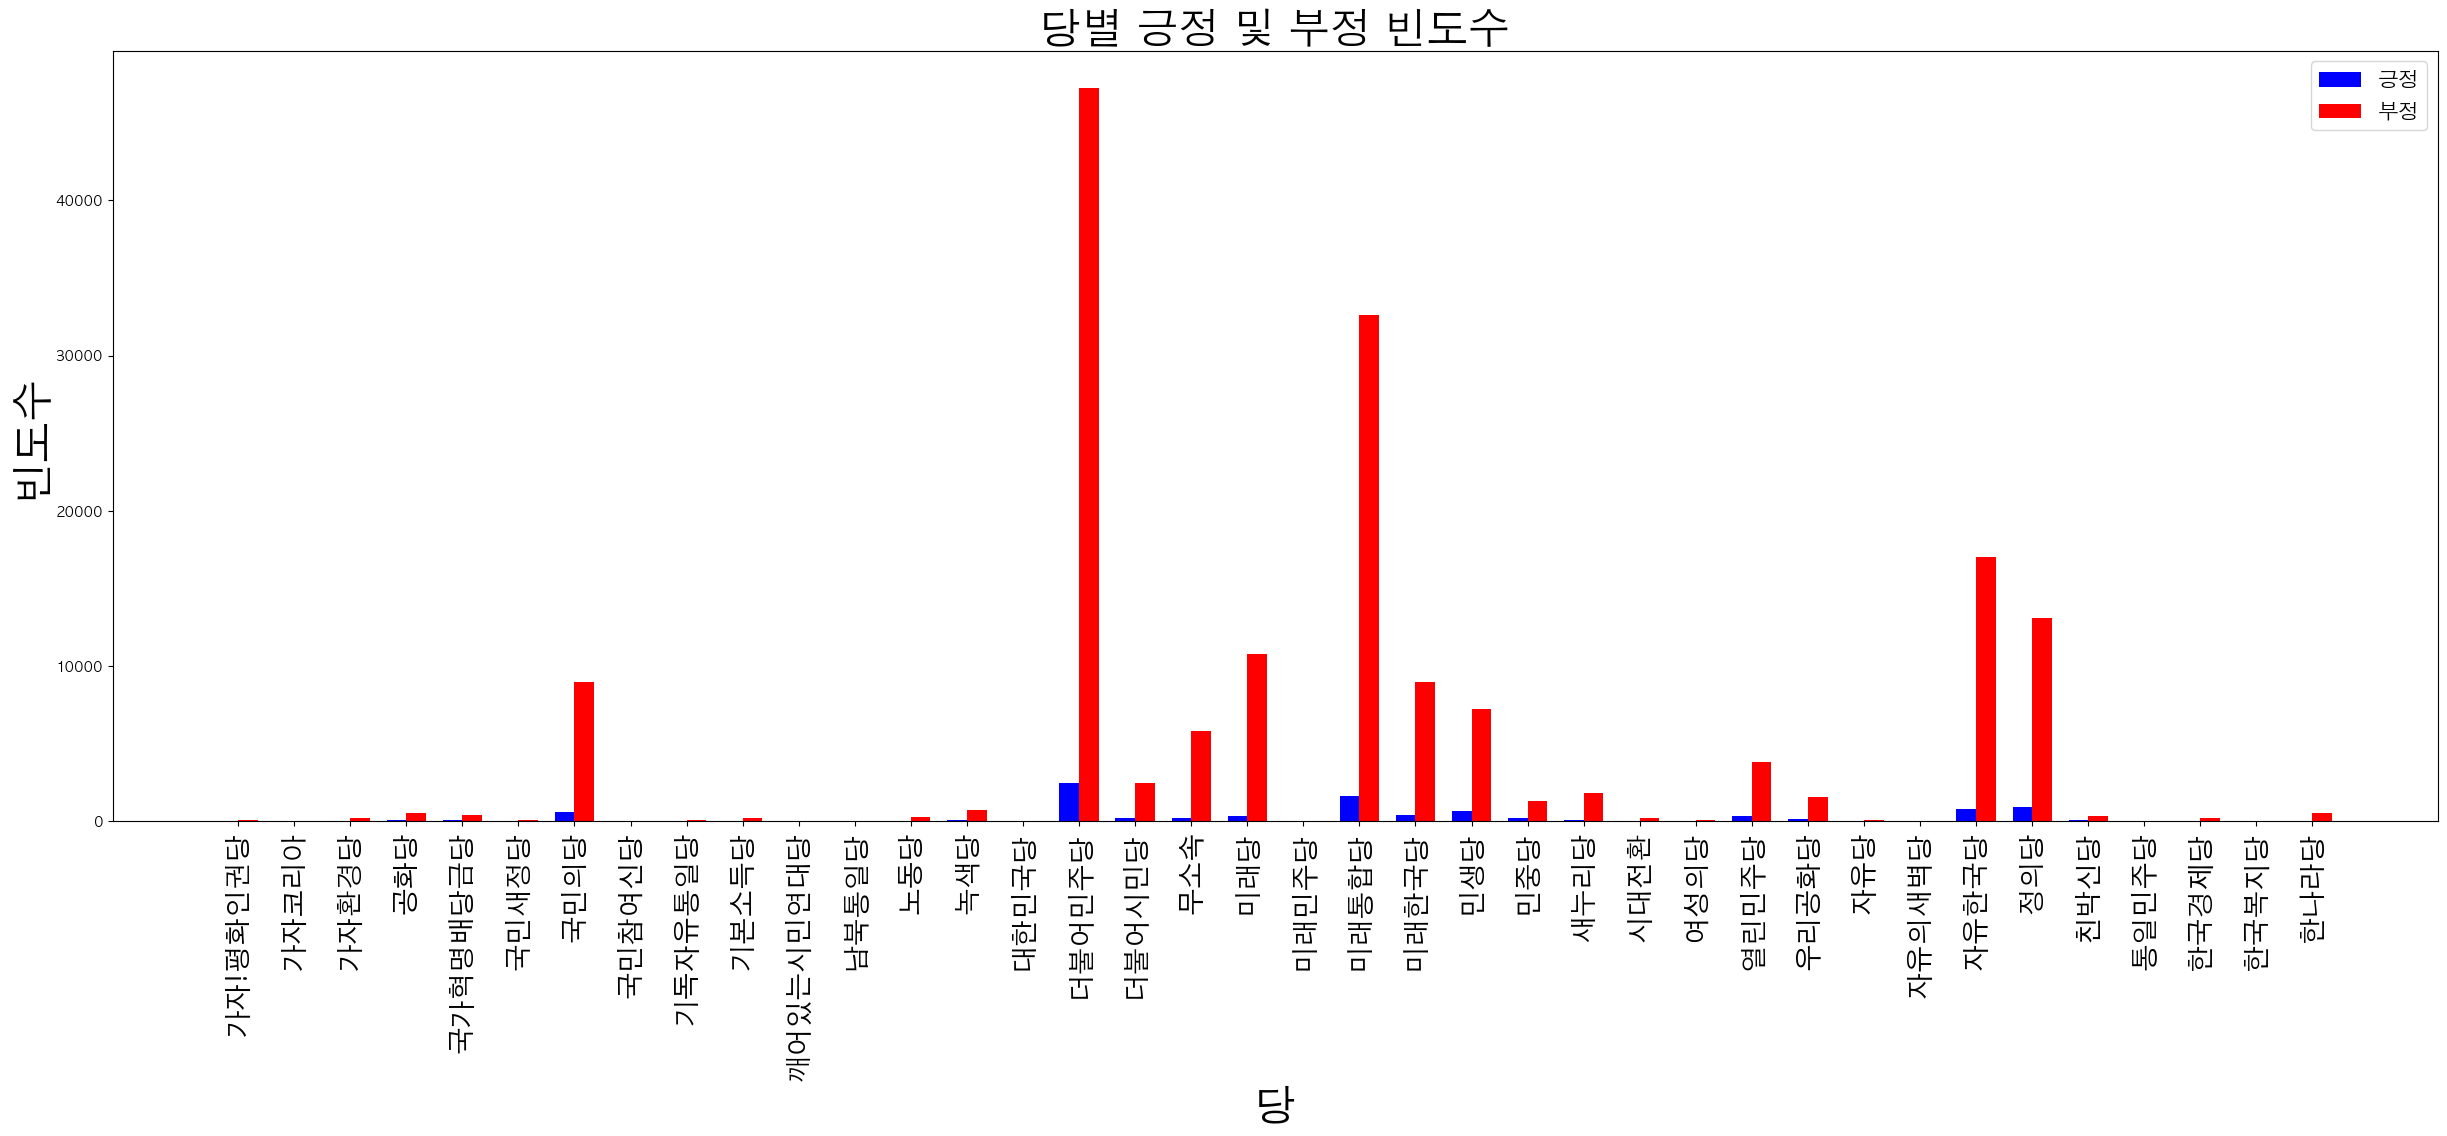

In [301]:
# 부정과 긍정을 따로 추출하여 데이터프레임 생성
neg_df = senti_gb[senti_gb['label'] == '부정']
pos_df = senti_gb[senti_gb['label'] == '긍정']

# party_name으로 그룹화하여 부정과 긍정의 합을 계산
neg_grouped = neg_df.groupby('party_name')['party_content'].sum()
pos_grouped = pos_df.groupby('party_name')['party_content'].sum()

# 그래프 설정
bar_width = 0.35
index = np.arange(len(senti_gb['party_name'].unique()))  # 막대 그래프의 위치 설정

# 긍정과 부정을 나타내는 막대 그래프 그리기
plt.figure(figsize = (30, 10))
plt.bar(index, pos_grouped, bar_width, label='긍정', color='blue', align='center')
plt.bar(index + bar_width, neg_grouped, bar_width, label='부정', color='red', align='center')

plt.xlabel('당', fontsize = 30)
plt.ylabel('빈도수', fontsize = 30)
plt.title('당별 긍정 및 부정 빈도수', fontsize = 30)
plt.xticks(index + bar_width / 2, neg_df['party_name'].values, rotation = 90, fontsize = 20)
plt.legend(fontsize = 15)

# 하는 중

감정분석

In [105]:
senti_analyzer_df = news.copy()
senti_analyzer_df = senti_analyzer_df[['party_content']]
senti_analyzer_df = senti_analyzer_df.reset_index(drop = True)
senti_analyzer_df

,party_content
0,"[' 더불어민주당은 정책, 영입을 병행 추진하고 있다', ' 자유한국당은 선거연령..."
1,['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...
2,[' (사진=노진환 기자)[이데일리 김겨레 기자]자유한국당이 1일 추미애 법무부 장...
3,[' 그러면서 자유한국당이 자신을 향해 아들 공천 문제 때문에 여당 편을 든다고 반...
4,[' 출마지역으로는 문 대통령 사저가 있고 서형수 현 더불어민주당 의원이 불출마를 ...
...,...
66557,"['통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태..."
66558,['논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12...
66559,['com 4·15총선을 이틀 남긴 13일 정치권은 미래통합당이 제기한 ‘여...
66560,"[' 더불어민주당 이낙연 상임선거대책위원장, 이인영 원내대표, 박광온 최고위원 등 ..."


In [135]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

senti_analyzer = SentimentIntensityAnalyzer()
scores_lst = []

for idx, row in senti_analyzer_df[:5].iterrows():
    scores = []
    content_str = row['party_content']
    content_str = eval(content_str)
    for i in range(len(content_str)):
        senti_scores = senti_analyzer.polarity_scores(content_str[i])
        scores.append(senti_scores)
    scores_lst.append(scores)
    
print(scores_lst)

[[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}], [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}], [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}], [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}], [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yurim/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [133]:
senti_analyzer_df[:5]

,party_content
0,"[' 더불어민주당은 정책, 영입을 병행 추진하고 있다', ' 자유한국당은 선거연령..."
1,['[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한...
2,[' (사진=노진환 기자)[이데일리 김겨레 기자]자유한국당이 1일 추미애 법무부 장...
3,[' 그러면서 자유한국당이 자신을 향해 아들 공천 문제 때문에 여당 편을 든다고 반...
4,[' 출마지역으로는 문 대통령 사저가 있고 서형수 현 더불어민주당 의원이 불출마를 ...
